# 29. 데이터 이해하기

In [67]:
!pip install pyupbit
# https://github.com/sharebook-kr/pyupbit

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyupbit
plt.style.use("seaborn")

In [69]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=365).loc[:, "close"].to_frame()
df.rename(columns = {'close':'price'},inplace=True)
df

,price
2021-05-28 09:00:00+09:00,43723000.0
2021-05-29 09:00:00+09:00,42688000.0
2021-05-30 09:00:00+09:00,43177000.0
2021-05-31 09:00:00+09:00,43761000.0
2021-06-01 09:00:00+09:00,43200000.0
...,...
2022-05-23 09:00:00+09:00,37436000.0
2022-05-24 09:00:00+09:00,37827000.0
2022-05-25 09:00:00+09:00,37935000.0
2022-05-26 09:00:00+09:00,37662000.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-05-28 09:00:00+09:00 to 2022-05-27 09:00:00+09:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<AxesSubplot:>

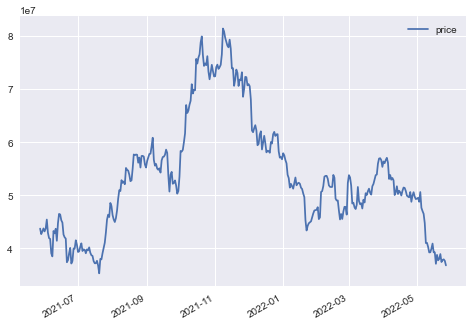

In [71]:
df.plot()

In [72]:
df["returns"] = np.log(df.div(df.shift(1)))

In [73]:
df

,price,returns
2021-05-28 09:00:00+09:00,43723000.0,NaN
2021-05-29 09:00:00+09:00,42688000.0,-0.023956
2021-05-30 09:00:00+09:00,43177000.0,0.011390
2021-05-31 09:00:00+09:00,43761000.0,0.013435
2021-06-01 09:00:00+09:00,43200000.0,-0.012903
...,...,...
2022-05-23 09:00:00+09:00,37436000.0,-0.039209
2022-05-24 09:00:00+09:00,37827000.0,0.010390
2022-05-25 09:00:00+09:00,37935000.0,0.002851
2022-05-26 09:00:00+09:00,37662000.0,-0.007223


# 30. 간단한 매수 후 보유 전략

In [74]:
df.dropna(inplace = True)

In [75]:
df

,price,returns
2021-05-29 09:00:00+09:00,42688000.0,-0.023956
2021-05-30 09:00:00+09:00,43177000.0,0.011390
2021-05-31 09:00:00+09:00,43761000.0,0.013435
2021-06-01 09:00:00+09:00,43200000.0,-0.012903
2021-06-02 09:00:00+09:00,43732000.0,0.012240
...,...,...
2022-05-23 09:00:00+09:00,37436000.0,-0.039209
2022-05-24 09:00:00+09:00,37827000.0,0.010390
2022-05-25 09:00:00+09:00,37935000.0,0.002851
2022-05-26 09:00:00+09:00,37662000.0,-0.007223


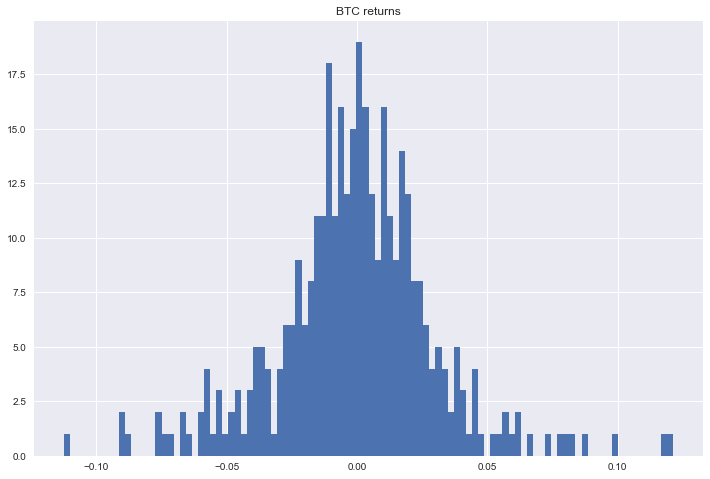

In [76]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("BTC returns")
plt.show()

In [77]:
df.returns.sum()

-0.17221340407243835

In [78]:
np.exp(df.returns.sum())

0.841799510555086

In [79]:
df.price[-1]/df.price[0] # 위의 결과와 다른 이유는?

0.8622095202398801

In [80]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [81]:
df

,price,returns,creturns
2021-05-29 09:00:00+09:00,42688000.0,-0.023956,0.976328
2021-05-30 09:00:00+09:00,43177000.0,0.011390,0.987512
2021-05-31 09:00:00+09:00,43761000.0,0.013435,1.000869
2021-06-01 09:00:00+09:00,43200000.0,-0.012903,0.988038
2021-06-02 09:00:00+09:00,43732000.0,0.012240,1.000206
...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,-0.039209,0.856208
2022-05-24 09:00:00+09:00,37827000.0,0.010390,0.865151
2022-05-25 09:00:00+09:00,37935000.0,0.002851,0.867621
2022-05-26 09:00:00+09:00,37662000.0,-0.007223,0.861377


<AxesSubplot:title={'center':'btc - buy and hold'}>

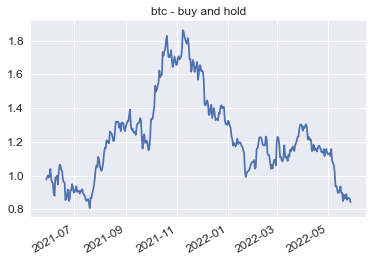

In [82]:
df.creturns.plot(figsize=(6,4), title="btc - buy and hold", fontsize=12)

<AxesSubplot:title={'center':'btc - price'}>

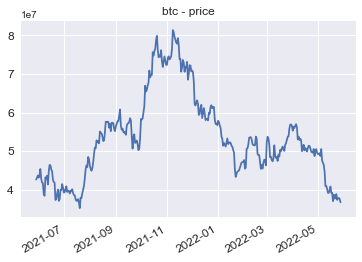

In [83]:
df.price.plot(figsize=(6,4), title="btc - price", fontsize=12)

# 31. 성능 지표



In [84]:
df

,price,returns,creturns
2021-05-29 09:00:00+09:00,42688000.0,-0.023956,0.976328
2021-05-30 09:00:00+09:00,43177000.0,0.011390,0.987512
2021-05-31 09:00:00+09:00,43761000.0,0.013435,1.000869
2021-06-01 09:00:00+09:00,43200000.0,-0.012903,0.988038
2021-06-02 09:00:00+09:00,43732000.0,0.012240,1.000206
...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,-0.039209,0.856208
2022-05-24 09:00:00+09:00,37827000.0,0.010390,0.865151
2022-05-25 09:00:00+09:00,37935000.0,0.002851,0.867621
2022-05-26 09:00:00+09:00,37662000.0,-0.007223,0.861377


In [85]:
df.creturns.iloc[-1]

0.8417995105550857

In [86]:
df.returns.sum()

-0.17221340407243835

In [87]:
df.describe()

,price,returns,creturns
count,3.640000e+02,364.000000,364.000000
mean,5.350804e+07,-0.000473,1.223796
std,1.092549e+07,0.030588,0.249880
min,3.530500e+07,-0.112417,0.807470
25%,4.582850e+07,-0.015446,1.048155
50%,5.188350e+07,0.000165,1.186641
75%,5.802975e+07,0.016547,1.327213
max,8.140300e+07,0.121214,1.861789


In [88]:
df.returns.mean() * 364 # mean return

-0.17221340407243835

In [89]:
df.returns.std() * np.sqrt(364) #risk

0.583584466561923

In [90]:
df

,price,returns,creturns
2021-05-29 09:00:00+09:00,42688000.0,-0.023956,0.976328
2021-05-30 09:00:00+09:00,43177000.0,0.011390,0.987512
2021-05-31 09:00:00+09:00,43761000.0,0.013435,1.000869
2021-06-01 09:00:00+09:00,43200000.0,-0.012903,0.988038
2021-06-02 09:00:00+09:00,43732000.0,0.012240,1.000206
...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,-0.039209,0.856208
2022-05-24 09:00:00+09:00,37827000.0,0.010390,0.865151
2022-05-25 09:00:00+09:00,37935000.0,0.002851,0.867621
2022-05-26 09:00:00+09:00,37662000.0,-0.007223,0.861377


In [91]:
df["cummax"] = df.creturns.cummax()

<AxesSubplot:title={'center':'btc - max drawdown'}>

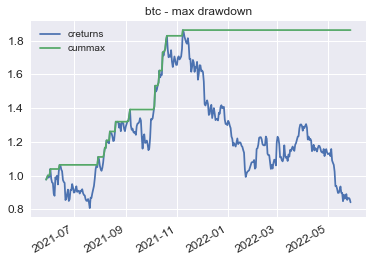

In [92]:
df[["creturns", "cummax"]].plot(figsize=(6,4), title="btc - max drawdown", fontsize=12)

In [93]:
drawdown = df["cummax"] - df["creturns"]
drawdown

2021-05-29 09:00:00+09:00    0.000000
2021-05-30 09:00:00+09:00    0.000000
2021-05-31 09:00:00+09:00    0.000000
2021-06-01 09:00:00+09:00    0.012831
2021-06-02 09:00:00+09:00    0.000663
                               ...   
2022-05-23 09:00:00+09:00    1.005581
2022-05-24 09:00:00+09:00    0.996638
2022-05-25 09:00:00+09:00    0.994168
2022-05-26 09:00:00+09:00    1.000412
2022-05-27 09:00:00+09:00    1.019989
Length: 364, dtype: float64

In [94]:
drawdown.max()

1.0199894792214617

In [95]:
drawdown.idxmax()

Timestamp('2022-05-27 09:00:00+0900', tz='대한민국 표준시')

# 32. SMA 교차전략 - 개요

In [96]:
!pip install cufflinks
!pip install chart_studio

In [97]:
import cufflinks as cf
import chart_studio
chart_studio.tools.set_credentials_file(username='test', api_key='api_test')
cf.go_offline(connected=True)
import plotly.io as pio
pio.renderers.default = "colab"

In [98]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=365)
qf = cf.QuantFig(df = df.loc["2021":"2022"])

In [99]:
qf.iplot(title="BTC", name = "BTC")

In [100]:
qf.add_sma(periods=20)
qf.add_sma(periods=100)

In [101]:
qf.iplot(title="BTC", name="BTC")

# 33. SMA 교차전략 정의하기

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyupbit 
plt.style.use("seaborn")

In [103]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=730).loc[:, "close"].to_frame()
df.rename(columns = {'close':'price'},inplace=True)
df

,price
2020-05-28 09:00:00+09:00,11579000.0
2020-05-29 09:00:00+09:00,11398000.0
2020-05-30 09:00:00+09:00,11581000.0
2020-05-31 09:00:00+09:00,11432000.0
2020-06-01 09:00:00+09:00,12112000.0
...,...
2022-05-23 09:00:00+09:00,37436000.0
2022-05-24 09:00:00+09:00,37827000.0
2022-05-25 09:00:00+09:00,37935000.0
2022-05-26 09:00:00+09:00,37662000.0


In [104]:
sma_s = 50
sma_l = 200

In [105]:
df["SMA_S"] = df.price.rolling(sma_s).mean()

In [106]:
df["SMA_L"] = df.price.rolling(sma_l).mean()

In [107]:
df

,price,SMA_S,SMA_L
2020-05-28 09:00:00+09:00,11579000.0,NaN,NaN
2020-05-29 09:00:00+09:00,11398000.0,NaN,NaN
2020-05-30 09:00:00+09:00,11581000.0,NaN,NaN
2020-05-31 09:00:00+09:00,11432000.0,NaN,NaN
2020-06-01 09:00:00+09:00,12112000.0,NaN,NaN
...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,47166460.0,54513780.0
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0


<AxesSubplot:title={'center':'BTC - SMA50 | SMA200'}>

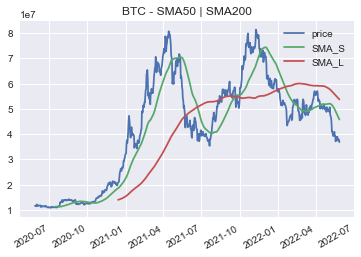

In [108]:
df.plot(figsize=(6,4), title="BTC - SMA{} | SMA{}".format(sma_s, sma_l))

<AxesSubplot:title={'center':'BTC - SMA50 | SMA200'}>

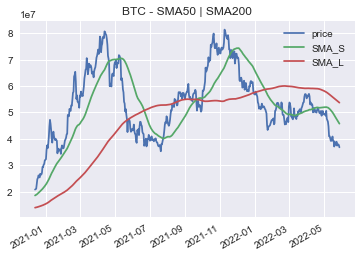

In [109]:
df.dropna(inplace=True)
df.plot(figsize=(6,4), title="BTC - SMA{} | SMA{}".format(sma_s, sma_l))

In [110]:
df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)
df

,price,SMA_S,SMA_L,position
2020-12-13 09:00:00+09:00,20793000.0,18549720.0,13933890.0,1
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1
...,...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,47166460.0,54513780.0,-1
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1


<AxesSubplot:title={'center':'BTC - SMA50 | SMA200'}>

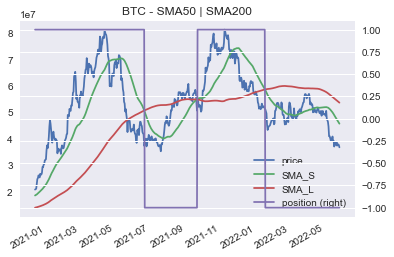

In [111]:
df.plot(figsize=(6,4), title="BTC - SMA{} | SMA{}".format(sma_s, sma_l), secondary_y="position")

# 34. 백터화된 백 테스팅 전략

In [112]:
df

,price,SMA_S,SMA_L,position
2020-12-13 09:00:00+09:00,20793000.0,18549720.0,13933890.0,1
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1
...,...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,47166460.0,54513780.0,-1
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1


In [113]:
df["returns"] = np.log(df.price.div(df.price.shift(1)))
df

,price,SMA_S,SMA_L,position,returns
2020-12-13 09:00:00+09:00,20793000.0,18549720.0,13933890.0,1,NaN
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1,0.006997
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1,0.007802
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1,0.081198
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1,0.077930
...,...,...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,47166460.0,54513780.0,-1,-0.039209
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1,0.010390
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1,0.002851
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1,-0.007223


In [114]:
df["strategy"] = df.position.shift(1) * df["returns"]
df

,price,SMA_S,SMA_L,position,returns,strategy
2020-12-13 09:00:00+09:00,20793000.0,18549720.0,13933890.0,1,NaN,NaN
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1,0.006997,0.006997
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1,0.007802,0.007802
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1,0.081198,0.081198
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1,0.077930,0.077930
...,...,...,...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,47166460.0,54513780.0,-1,-0.039209,0.039209
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1,0.010390,-0.010390
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1,0.002851,-0.002851
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1,-0.007223,0.007223


In [115]:
df.dropna(inplace = True)

In [116]:
df[["returns", "strategy"]].sum()

returns     0.571072
strategy    0.521498
dtype: float64

In [117]:
df[["returns", "strategy"]].sum().apply(np.exp)

returns     1.770163
strategy    1.684549
dtype: float64

In [118]:
df[["returns", "strategy"]].mean()

returns     0.001077
strategy    0.000984
dtype: float64

In [119]:
df[["returns", "strategy"]].std() * np.sqrt(365)

returns     0.669405
strategy    0.669458
dtype: float64

In [120]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)

In [121]:
df

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1,0.006997,0.006997,1.007022,1.007022
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1,0.007802,0.007802,1.014909,1.014909
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1,0.081198,0.081198,1.100755,1.100755
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1,0.077930,0.077930,1.189968,1.189968
2020-12-18 09:00:00+09:00,25151000.0,19345540.0,14217500.0,1,0.016355,0.016355,1.209590,1.209590
...,...,...,...,...,...,...,...,...
2022-05-23 09:00:00+09:00,37436000.0,47166460.0,54513780.0,-1,-0.039209,0.039209,1.800414,1.656245
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1,0.010390,-0.010390,1.819218,1.639126
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1,0.002851,-0.002851,1.824412,1.634459
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1,-0.007223,0.007223,1.811283,1.646307


<AxesSubplot:title={'center':'BTC - strategy'}>

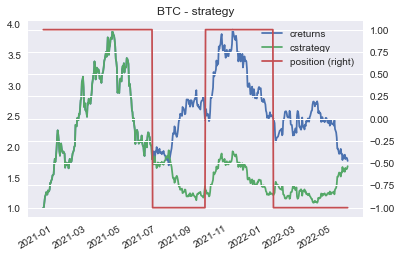

In [122]:
df[["creturns", "cstrategy","position"]].plot(figsize=(6,4), title="BTC - strategy", secondary_y="position")

<AxesSubplot:title={'center':'BTC - strategy'}>

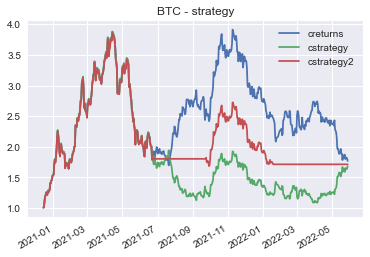

In [123]:
df["position2"] = np.where(df["SMA_S"] > df["SMA_L"], 1, 0)
df["strategy2"] = df.position2.shift(1) * df["returns"]
df["cstrategy2"] = df["strategy2"].cumsum().apply(np.exp)
df[["creturns", "cstrategy","cstrategy2"]].plot(figsize=(6,4), title="BTC - strategy")

In [124]:
outperf = df.cstrategy.iloc[-1] - df.creturns.iloc[-1]
outperf

-0.0856138600821863

# 35. 최적의 SMA 전략 찾기

In [125]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=730).loc[:, "close"].to_frame()
df.rename(columns = {'close':'price'},inplace=True)

In [126]:
def run_strategy(SMA):
  data = df.copy()
  data["returns"] = np.log(data.price.div(data.price.shift(1)))
  data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
  data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
  data.dropna(inplace = True)
  data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
  data["strategy"] = data.position.shift(1) * data["returns"]
  data.dropna(inplace = True)

  return data[["returns", "strategy"]].sum().apply(np.exp)

In [127]:
run_strategy((50, 200))

returns     1.770115
strategy    1.684595
dtype: float64

In [128]:
run_strategy((10, 200))

returns     1.770115
strategy    1.692494
dtype: float64

In [129]:
run_strategy((10, 20))

returns     3.213656
strategy    3.223032
dtype: float64

In [130]:
def run_strategy(SMA):
  data = df.copy()
  data["returns"] = np.log(data.price.div(data.price.shift(1)))
  data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
  data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
  data.dropna(inplace = True)
  data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
  data["strategy"] = data.position.shift(1) * data["returns"]
  data.dropna(inplace = True)

  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [132]:
import scipy.optimize as optimize
from scipy.optimize import brute

In [133]:
brute(run_strategy, ((20, 40, 1), (150, 200, 1)), finish=None)

array([ 20., 151.])

In [134]:
run_strategy((20,150))

-4.262316068117475

In [135]:
run_strategy((20,130))

-4.2257063418934315

In [136]:
import lib.CoinInstrument as CoinInstrument

In [137]:
btc_minute = CoinInstrument.CoinInstrument('KRW-BTC', count=730, interval='day', to='2022-05-26 20:00')